# **Generación de test cases para calidad de software a partir de las US de la API de Jira**

### **Autor:** María Belén Aguirre  
### **Curso:** Inteligencia artificial: Generación de Prompts  
### **Nº de comisión:** 67115  
### **Proyecto:** Generación de test cases para calidad de software a partir de las US de la API de Jira  

## **Presentación del problema a abordar**

En el aseguramiento de la calidad de software, garantizar la calidad es un desafío continuo que abarca todas las etapas del ciclo de vida del software. Los equipos de calidad deben convertir las historias de usuario (User Stories, US) y sus criterios de aceptación en casos de prueba efectivos. Este proceso es manual y cosume gran cantidad de tiempo durante el Sprint, especialmente en proyectos con gran cantidad de historias de usuario o para aquellos QA trabajando en varios proyectos paralelamente. Es por ello, que resultaría optimo el hecho de poder generar automaticamente al menos esos casos de prueba que son basicos para otorgar mayor tiempo al equipo a crear test cases elaborados y que requieran un razonamiento mas amplio del funcionamiento de la aplicacion. Por otro lado, poder documentar automaticamente aquellos casos basicos resulta en mayor tiempo para ejecutar los casos complejos.

### **¿Por qué es una problemática?**
1. **Tiempo y recursos:** La generación manual de test cases consume tiempo que podría ser usado para realizar pruebas efectivas o avanzar en codificación de pruebas automatizadas.
2. **Herramientas disponibles:** En algunos casos, algunas empresas no cuentan con la opción premium de JIRA por lo cual muchas funcionalidades que podrían agilizar el relavamiento de requerimientos, no se encuentran a disposición, haciendo esta etapa del proceso más dificil de trazar.
3. **Escalabilidad:** En proyectos grandes, el volumen de trabajo aumenta exponencialmente, dificultando el seguimiento y la calidad.


### **Relevancia del problema**
Automatizar este proceso permite estandarizar los test cases, reducir tiempos y asegurar que los criterios de aceptación estén completamente cubiertos, mejorando así la calidad del software entregado.

## **Desarrollo de la propuesta de solución**

La solución propuesta utiliza modelos de inteligencia artificial en dos fases:

### **Fase 1: Generación de test cases (Modelo texto a texto)**
1. **Acceso a Jira API:** Obtendremos las historias de usuario y sus criterios de aceptación.
2. **Procesamiento de texto:** Usaremos prompts diseñados para transformar cada criterio de aceptación en un test case detallado.
3. **Documentación automatizada:** Generaremos un archivo Excel con las historias de usuario, criterios de aceptación y los test cases generados.

- Input: Descripción y criterios de aceptación de la historia de usuario por medio de un get a la API jira.
  <br>
  Ejemplo para una sección de la App que almacena piezas gráficas subidas por diseñadores y que puede ser consumida por otros roles de la app: requesters o admins.
   <br>
### **Criterios de Aceptación:**
   <br>
   
1. **Creación de Piezas**:
- Campo de Fecha Opcional:

El campo de fecha no es obligatorio al crear una nueva pieza.
- Validación de Fecha Futura:
Si se selecciona una fecha, esta debe ser una fecha futura.
No se permite seleccionar la fecha actual ni una fecha pasada para la fecha límite.

2. **Edición de Piezas:**
Edición de Fecha Definida:

Si el campo de fecha ya tiene una fecha definida, se permitirá su edición.
La fecha no se puede eliminar una vez definida; solo se permite modificarla.

-Validación de Fecha Editada:

La fecha editada no puede ser anterior a la fecha actual. Solo se permiten fechas futuras.

-Campo de Fecha Vacío:

Si el campo de fecha está vacío en la edición, no será obligatorio completarlo.

3. **Permiso de Guardado:**

Si ya existe una fecha actual o pasada en el campo de fecha, se debe permitir guardar la pieza incluso si se realizan cambios en otros campos.
La validación de la fecha no dependerá de otros factores, como la subida de un boceto, el cambio de estado o cualquier otra modificación en la pieza. Guardar la pieza será posible independientemente de estos cambios.


- Output: Descripción de los test cases conteniendo titulo, precondiciones para ejecutarlo, pasos para replicarlo y resultado esperado

A modo de ejemplo, un posible output siguiendo el input mencionado previamente:

# Test Cases para Creación de Piezas

## Caso de Prueba: Crear una pieza sin especificar una fecha

### Precondición:
Iniciar sesión como Admin, Requester o Designer.

### Pasos:
1. Navegar al formulario de creación de piezas.
2. Completar los campos obligatorios sin ingresar una fecha.
3. Guardar la pieza.

### Resultado Esperado:
- La pieza se guarda correctamente sin requerir una fecha.

---

## Caso de Prueba: Seleccionar una fecha futura al crear una pieza

### Precondición:
- Iniciar sesión como Admin, Requester o Designer.

### Pasos:
1. Navegar al formulario de creación de piezas.
2. Completar los campos obligatorios e ingresar una fecha futura.
3. Guardar la pieza.

### Resultado Esperado:
- La pieza se guarda correctamente con la fecha futura.

---

## Caso de Prueba: Seleccionar la fecha actual al crear una pieza

### Precondición:
- Iniciar sesión como Admin, Requester o Designer.

### Pasos:
1. Navegar al formulario de creación de piezas.
2. Completar los campos obligatorios e ingresar la fecha actual.
3. Guardar la pieza.

### Resultado Esperado:
- Aparece un mensaje de error indicando que la fecha debe ser futura.


### **Fase 2: Representación visual (Modelo texto a imagen)**
1. **Flujograma de test cases:** A partir de los test cases generados, usaremos un modelo de texto a imagen para crear un flujograma que visualice el flujo de validaciones y pruebas.
2. **Prompts para texto a imagen:** Estos prompts describirán los pasos y la relación entre ellos para estructurar el diagrama.

**Ejemplo de Prompt:**
- Input: "Flujo de validación: Paso 1: Verificar botón visible, Paso 2: Descargar archivo, Paso 3: Confirmar mensaje de éxito."
- Output: Un flujograma de funcionalidades del sistema que representa estos pasos y sus conexiones.

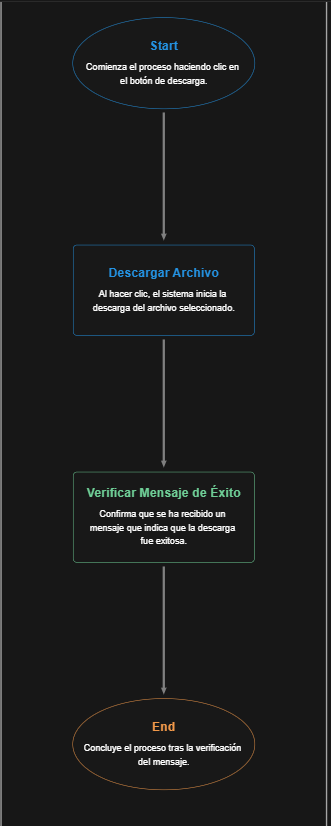

### **Viabilidad técnica**
1. **Herramientas y recursos:** 
   - Disponemos de acceso a la API de Jira para obtener las historias de usuario.
   - Los modelos de OpenAI (GPT para texto a texto y mymap.ai para texto a imagen) son accesibles y bien documentados.
   - Herramientas como Python, Pandas y Excel facilitan la automatización de documentos.

### **Justificación de las elecciones**
- **Uso de IA:** Los modelos son adecuados para generar texto detallado y visualizaciones precisas, optimizando tareas que normalmente ante proyectos de gran escala demandan mucha inversión de tiempo.
- **Automatización:** Reducirá significativamente los tiempos de generación de casos de prueba y documentación. Permitiendo aprovechar dicho tiempo para ejecutar casos de prueba, avanzar en codificación de pruebas automáticas o asistir cualquier bug de prioridad urgente.
- **Impacto:** El proyecto no solo aborda un problema práctico, sino que también sirve como demostración del poder de la inteligencia artificial en la mejora de procesos de QA.